# notice: the data was collected in virtual robot control env (Task name: Robot3DArrow). the robot is fixed, but B1 was instructed to imagine moving the end-effector to 6 possible directions. here, running a LSTM model for classification of 6 targets/direction in B1  

In [1]:
# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import hdf5storage as hdf5s
import h5py

In [191]:

# Experiment info 
# loading the imagined data

# initilize the values
class structtype():
    pass

ExptDays = list(['20210115','20210122','20210128','20210201','20210212','20210226','20210305','20210312','20210319','20210326','20210402'])
NumDay = len(ExptDays);
SessionDay = [ structtype() for i in range(NumDay)]
SessionDay[0].hhmmss = list(['142208','142838','143106','143526','143760','144109','144446','145515','145747'])
SessionDay[1].hhmmss = list(['104446','105158','105440','105904','152914','153229'])
SessionDay[2].hhmmss = list(['110711','111306','111452','111653','134317','140960','141304','143857','144220','144505','144803'])
SessionDay[3].hhmmss = list(['140901'])
SessionDay[4].hhmmss = list(['111129','133441'])
SessionDay[5].hhmmss = list(['110328','110943','134354'])
SessionDay[6].hhmmss = list(['111456','133931'])
SessionDay[7].hhmmss = list(['105925','132907','133811'])
SessionDay[8].hhmmss = list(['110258','110748','111138','111725','133910'])
SessionDay[9].hhmmss = list(['105820','110719','111302','111911','112023','133836','143503'])
SessionDay[10].hhmmss = list(['110504','110734','114108','114256','133952','134360','134609'])


# for reading mat file from matlab
# it is easier to use class for further extracting necessary params or data
class MatFileAnalyzer():
    
    # first mandatory method; constructor
    def __init__(self,Mat_data):
        self.Fs = Mat_data['TrialData']['Params']['Fs'][0][0]
        self.UpdateRate = Mat_data['TrialData']['Params']['UpdateRate'][0][0]
        self.TargetID = Mat_data['TrialData']['TargetID'][0][0]
        self.SelectedTargetID = Mat_data['TrialData']['SelectedTargetID'][0][0]
        self.MaxReachTime = Mat_data['TrialData']['Params']['MaxReachTime'][0][0]
        self.Click_BinNum = Mat_data['TrialData']['Params']['ClickCounter'][0][0]
        
    def ECoG_Raw(self):

        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData = np.empty((0,128), dtype=float)
        for i in range(BinNum):
            Bin = Mat_data['TrialData']['BroadbandData'][i][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData = np.concatenate((ECoGData, BinData.T), axis=0)

        return ECoGData
    
    
    def ECoG_Raw_Trial(self):
        
        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData_Trial = np.empty((0,128), dtype=float)
                               
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:

            Bin = Mat_data['TrialData']['BroadbandData'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)

        return ECoGData_Trial
        
    
    def Features_All(self):
        
        Features = Mat_data['TrialData']['NeuralFeatures']
        BinNum = Features.shape[0]
        NeuralFeatures = np.empty((0,896), dtype=float)

        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:

            Bin = Mat_data['TrialData']['NeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)

        return NeuralFeatures
        
    def SmoothedFeatures_All(self):
        
        Features = Mat_data['TrialData']['SmoothedNeuralFeatures']
        BinNum = Features.shape[0]
        SmoothedNeuralFeatures = np.empty((0,896), dtype=float)
                  
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:

            Bin = Mat_data['TrialData']['SmoothedNeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            SmoothedNeuralFeatures = np.concatenate((SmoothedNeuralFeatures, BinData), axis=0)

        return SmoothedNeuralFeatures
    
    def SmoothedFeatures_Controls(self):
        
        Features = Mat_data['TrialData']['SmoothedNeuralFeatures']
        BinNum = Features.shape[0]
        SmoothedNeuralFeatures = np.empty((0,896), dtype=float)
                  
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl:

            Bin = Mat_data['TrialData']['SmoothedNeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            SmoothedNeuralFeatures = np.concatenate((SmoothedNeuralFeatures, BinData), axis=0)

        return (self.Click_BinNum, SmoothedNeuralFeatures)

# bin data only when the correct selection is chosen
Trials_T1 = np.empty((0,896), dtype=float)
Trials_T2 = np.empty((0,896), dtype=float)
Trials_T3 = np.empty((0,896), dtype=float)
Trials_T4 = np.empty((0,896), dtype=float)
Trials_T5 = np.empty((0,896), dtype=float)
Trials_T6 = np.empty((0,896), dtype=float)

Trials_Raw_T1 = np.empty((0,128), dtype=float)
Trials_Raw_T2 = np.empty((0,128), dtype=float)
Trials_Raw_T3 = np.empty((0,128), dtype=float)
Trials_Raw_T4 = np.empty((0,128), dtype=float)
Trials_Raw_T5 = np.empty((0,128), dtype=float)
Trials_Raw_T6 = np.empty((0,128), dtype=float)

# bin data for whole period of control in stage 3
Trials_T1_BinControl = np.empty((0,896), dtype=float)
Trials_T2_BinControl = np.empty((0,896), dtype=float)
Trials_T3_BinControl = np.empty((0,896), dtype=float)
Trials_T4_BinControl = np.empty((0,896), dtype=float)
Trials_T5_BinControl = np.empty((0,896), dtype=float)
Trials_T6_BinControl = np.empty((0,896), dtype=float)


# numnber of censequative bins for making correct selections
Click_BinNum_T1 = []
Click_BinNum_T2 = []
Click_BinNum_T3 = []
Click_BinNum_T4 = []
Click_BinNum_T5 = []
Click_BinNum_T6 = []

Day_NumTrial_T1 = []
Day_NumTrial_T2 = []
Day_NumTrial_T3 = []
Day_NumTrial_T4 = []
Day_NumTrial_T5 = []
Day_NumTrial_T6 = []


# loading the day/block/session data from the location
for Day in [ 0, 1, 2, 3, 4, 5, 6, 7, 8,9]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;
    ID5 = 0;
    ID6 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'Robot3DArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if TrialData.SelectedTargetID == TrialData.TargetID:
                
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                Trial_BinControls = TrialData.SmoothedFeatures_Controls()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1.append(TrialData.Click_BinNum)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 
                    Trials_T1_BinControl = np.append(Trials_T1_BinControl, Trial_BinControls[1], axis=0)

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2.append(TrialData.Click_BinNum)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0)
                    Trials_T2_BinControl = np.append(Trials_T2_BinControl, Trial_BinControls[1], axis=0)

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3.append(TrialData.Click_BinNum)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0)
                    Trials_T3_BinControl = np.append(Trials_T3_BinControl, Trial_BinControls[1], axis=0)

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4.append(TrialData.Click_BinNum)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0)
                    Trials_T4_BinControl = np.append(Trials_T4_BinControl, Trial_BinControls[1], axis=0)
                    
                elif TrialData.TargetID == 5:
                    ID5 = ID5+1
                    Trials_T5 = np.append(Trials_T5, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T5.append(TrialData.Click_BinNum)
                    Trials_Raw_T5 = np.append(Trials_Raw_T5, ECoGData_Trial, axis=0) 
                    Trials_T5_BinControl = np.append(Trials_T5_BinControl, Trial_BinControls[1], axis=0)
                    
                elif TrialData.TargetID == 6:
                    ID6 = ID6+1
                    Trials_T6 = np.append(Trials_T6, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T6.append(TrialData.Click_BinNum)
                    Trials_Raw_T6 = np.append(Trials_Raw_T6, ECoGData_Trial, axis=0) 
                    Trials_T6_BinControl = np.append(Trials_T6_BinControl, Trial_BinControls[1], axis=0)
                    
                    
                    
    Day_NumTrial_T1.append(ID1)
    Day_NumTrial_T2.append(ID2)
    Day_NumTrial_T3.append(ID3)
    Day_NumTrial_T4.append(ID4)
    Day_NumTrial_T5.append(ID5)
    Day_NumTrial_T6.append(ID6)
    

print('End of Running Section')  

             

Session:142208
Trial: 1
Trial: 2


/home/reza/anaconda3/envs/RobotControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:197: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 3
Trial: 4
Session:142838
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Session:143106
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Session:143526
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:143760
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:144109
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:144446
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:145515

Trial: 17
Trial: 18
Session:133836
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:143503
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
End of Running Section


In [192]:
Trials_T6.shape 

(620, 896)

In [245]:
Trials_T1_BinControl.shape

(845, 896)

In [194]:
# extract hold-out data for one day for test laters
Trials_T1_HoldOut = np.empty((0,896), dtype=float)
Trials_T2_HoldOut = np.empty((0,896), dtype=float)
Trials_T3_HoldOut = np.empty((0,896), dtype=float)
Trials_T4_HoldOut = np.empty((0,896), dtype=float)
Trials_T5_HoldOut = np.empty((0,896), dtype=float)
Trials_T6_HoldOut = np.empty((0,896), dtype=float)


Trials_Raw_T1_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T2_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T3_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T4_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T5_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T6_HoldOut = np.empty((0,128), dtype=float)

Trials_Size_T1_HoldOut = [];
Trials_Size_T2_HoldOut = [];
Trials_Size_T3_HoldOut = [];
Trials_Size_T4_HoldOut = [];
Trials_Size_T5_HoldOut = [];
Trials_Size_T6_HoldOut = [];


# numnber of censequative bins for making correct selections
Click_BinNum_T1_HoldOut = []
Click_BinNum_T2_HoldOut = []
Click_BinNum_T3_HoldOut = []
Click_BinNum_T4_HoldOut = []
Click_BinNum_T5_HoldOut = []
Click_BinNum_T6_HoldOut = []


Day_NumTrial_T1_HoldOut = []
Day_NumTrial_T2_HoldOut = []
Day_NumTrial_T3_HoldOut = []
Day_NumTrial_T4_HoldOut = []
Day_NumTrial_T5_HoldOut = []
Day_NumTrial_T6_HoldOut = []

# tuple for recoding individual trials and its related number of click
Trials_T1_BinControl_HoldOut = []
Trials_T2_BinControl_HoldOut = []
Trials_T3_BinControl_HoldOut = []
Trials_T4_BinControl_HoldOut = []
Trials_T5_BinControl_HoldOut = []
Trials_T6_BinControl_HoldOut = []

# loading the day/block/session data from the location
for Day in [10]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;
    ID5 = 0;
    ID6 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows

        DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'Robot3DArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')

        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if TrialData.SelectedTargetID == TrialData.TargetID:
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                Trial_Size = ECoGData_Trial.shape[0]
                Trial_BinControls = TrialData.SmoothedFeatures_Controls()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1_HoldOut = np.append(Trials_T1_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T1_HoldOut = np.append(Trials_Raw_T1_HoldOut, ECoGData_Trial, axis=0) 
                    Trials_Size_T1_HoldOut = np.append(Trials_Size_T1_HoldOut, Trial_Size)
                    Trials_T1_BinControl_HoldOut.append(Trial_BinControls)

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2_HoldOut = np.append(Trials_T2_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T2_HoldOut = np.append(Trials_Raw_T2_HoldOut, ECoGData_Trial, axis=0) 
                    Trials_Size_T2_HoldOut = np.append(Trials_Size_T2_HoldOut, Trial_Size)
                    Trials_T2_BinControl_HoldOut.append(Trial_BinControls)

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3_HoldOut = np.append(Trials_T3_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T3_HoldOut = np.append(Trials_Raw_T3_HoldOut, ECoGData_Trial, axis=0) 
                    Trials_Size_T3_HoldOut = np.append(Trials_Size_T3_HoldOut, Trial_Size)
                    Trials_T3_BinControl_HoldOut.append(Trial_BinControls)

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4_HoldOut = np.append(Trials_T4_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T4_HoldOut = np.append(Trials_Raw_T4_HoldOut, ECoGData_Trial, axis=0)
                    Trials_Size_T4_HoldOut = np.append(Trials_Size_T4_HoldOut, Trial_Size)
                    Trials_T4_BinControl_HoldOut.append(Trial_BinControls)
                    
                elif TrialData.TargetID == 5:
                    ID5 = ID5+1
                    Trials_T5_HoldOut = np.append(Trials_T5_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T5_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T5_HoldOut = np.append(Trials_Raw_T5_HoldOut, ECoGData_Trial, axis=0)
                    Trials_Size_T5_HoldOut = np.append(Trials_Size_T5_HoldOut, Trial_Size)
                    Trials_T5_BinControl_HoldOut.append(Trial_BinControls)
                    
                elif TrialData.TargetID == 6:
                    ID6 = ID6+1
                    Trials_T6_HoldOut = np.append(Trials_T6_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T6_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T6_HoldOut = np.append(Trials_Raw_T6_HoldOut, ECoGData_Trial, axis=0)
                    Trials_Size_T6_HoldOut = np.append(Trials_Size_T6_HoldOut, Trial_Size)
                    Trials_T6_BinControl_HoldOut.append(Trial_BinControls)
                    
    Day_NumTrial_T1_HoldOut.append(ID1)
    Day_NumTrial_T2_HoldOut.append(ID2)
    Day_NumTrial_T3_HoldOut.append(ID3)
    Day_NumTrial_T4_HoldOut.append(ID4)
    Day_NumTrial_T5_HoldOut.append(ID5)
    Day_NumTrial_T6_HoldOut.append(ID6)
    

print('End of Running Section')  


Session:110504
Trial: 1
Trial: 2
Trial: 3


/home/reza/anaconda3/envs/RobotControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:71: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:110734
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:114108
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:114256
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:133952
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Session:134360
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial:

In [4]:
type(Trial_BinControls)

tuple

In [190]:
Trial_BinControls[1].shape

(33, 896)

# checking the CUDA

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())

True
GeForce GTX 1080
1


# decide the inputs to LSTM

In [ ]:
# these are the available options for right now

# choose the original bins for hg..

Data_T1 = Trials_T1[:,6*128:]
Data_T2 = Trials_T2[:,6*128:]
Data_T3 = Trials_T3[:,6*128:]
Data_T4 = Trials_T4[:,6*128:]
Data_T5 = Trials_T5[:,6*128:]
Data_T6 = Trials_T6[:,6*128:]

Data_T1_HoldOut = Trials_T1_HoldOut[:,6*128:]
Data_T2_HoldOut = Trials_T2_HoldOut[:,6*128:]
Data_T3_HoldOut = Trials_T3_HoldOut[:,6*128:]
Data_T4_HoldOut = Trials_T4_HoldOut[:,6*128:]
Data_T5_HoldOut = Trials_T5_HoldOut[:,6*128:]
Data_T6_HoldOut = Trials_T6_HoldOut[:,6*128:]

# choose the original bins for delta, beta, hg..

Data_T1 = np.concatenate((Trials_T1[:,0:128], Trials_T1[:,4*128:5*128], Trials_T1[:,6*128:]),axis = 1) 
Data_T2 = np.concatenate((Trials_T2[:,0:128], Trials_T2[:,4*128:5*128], Trials_T2[:,6*128:]),axis = 1) 
Data_T3 = np.concatenate((Trials_T3[:,0:128], Trials_T3[:,4*128:5*128], Trials_T3[:,6*128:]),axis = 1) 
Data_T4 = np.concatenate((Trials_T4[:,0:128], Trials_T4[:,4*128:5*128], Trials_T4[:,6*128:]),axis = 1) 
Data_T5 = np.concatenate((Trials_T5[:,0:128], Trials_T5[:,4*128:5*128], Trials_T5[:,6*128:]),axis = 1) 
Data_T6 = np.concatenate((Trials_T6[:,0:128], Trials_T6[:,4*128:5*128], Trials_T6[:,6*128:]),axis = 1) 

Data_T1_HoldOut = np.concatenate((Trials_T1_HoldOut[:,0:128], Trials_T1_HoldOut[:,4*128:5*128], Trials_T1_HoldOut[:,6*128:]),axis = 1) 
Data_T2_HoldOut = np.concatenate((Trials_T2_HoldOut[:,0:128], Trials_T2_HoldOut[:,4*128:5*128], Trials_T2_HoldOut[:,6*128:]),axis = 1) 
Data_T3_HoldOut = np.concatenate((Trials_T3_HoldOut[:,0:128], Trials_T3_HoldOut[:,4*128:5*128], Trials_T3_HoldOut[:,6*128:]),axis = 1) 
Data_T4_HoldOut = np.concatenate((Trials_T4_HoldOut[:,0:128], Trials_T4_HoldOut[:,4*128:5*128], Trials_T4_HoldOut[:,6*128:]),axis = 1) 
Data_T5_HoldOut = np.concatenate((Trials_T5_HoldOut[:,0:128], Trials_T5_HoldOut[:,4*128:5*128], Trials_T5_HoldOut[:,6*128:]),axis = 1) 
Data_T6_HoldOut = np.concatenate((Trials_T6_HoldOut[:,0:128], Trials_T6_HoldOut[:,4*128:5*128], Trials_T6_HoldOut[:,6*128:]),axis = 1) 


# choose the whole period of control with original bins for hg..

Data_T1 = Trials_T1_BinControl[:,6*128:]
Data_T2 = Trials_T2_BinControl[:,6*128:]
Data_T3 = Trials_T3_BinControl[:,6*128:]
Data_T4 = Trials_T4_BinControl[:,6*128:]
Data_T5 = Trials_T5_BinControl[:,6*128:]
Data_T6 = Trials_T6_BinControl[:,6*128:]

Data_T1_HoldOut = Trials_T1_HoldOut[:,6*128:]
Data_T2_HoldOut = Trials_T2_HoldOut[:,6*128:]
Data_T3_HoldOut = Trials_T3_HoldOut[:,6*128:]
Data_T4_HoldOut = Trials_T4_HoldOut[:,6*128:]
Data_T5_HoldOut = Trials_T5_HoldOut[:,6*128:]
Data_T6_HoldOut = Trials_T6_HoldOut[:,6*128:]


In [195]:
# here the input is chosed

# choose the original bins for hg..

Data_T1 = Trials_T1_BinControl[:,6*128:]
Data_T2 = Trials_T2_BinControl[:,6*128:]
Data_T3 = Trials_T3_BinControl[:,6*128:]
Data_T4 = Trials_T4_BinControl[:,6*128:]
Data_T5 = Trials_T5_BinControl[:,6*128:]
Data_T6 = Trials_T6_BinControl[:,6*128:]

Data_T1_HoldOut = Trials_T1_HoldOut[:,6*128:]
Data_T2_HoldOut = Trials_T2_HoldOut[:,6*128:]
Data_T3_HoldOut = Trials_T3_HoldOut[:,6*128:]
Data_T4_HoldOut = Trials_T4_HoldOut[:,6*128:]
Data_T5_HoldOut = Trials_T5_HoldOut[:,6*128:]
Data_T6_HoldOut = Trials_T6_HoldOut[:,6*128:]


In [196]:
Data_T6.shape

(1611, 128)

# Bring the data to torch space / peform LSTM

In [197]:
import torch
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader

In [198]:
# Hyper parameters
learning_rate = 0.001
sequence_length = 3
hidden_size = 50
num_classes = 6
batch_size = 64
input_size = 128
num_layers = 1
num_epochs = 10

In [199]:
# generate the train_data for LSTM
# use neural feature as input or the broad band

Data_T1_torch = torch.from_numpy(Data_T1)
Data_T2_torch = torch.from_numpy(Data_T2)
Data_T3_torch = torch.from_numpy(Data_T3)
Data_T4_torch = torch.from_numpy(Data_T4)
Data_T5_torch = torch.from_numpy(Data_T5)
Data_T6_torch = torch.from_numpy(Data_T6)


Data_T1_HoldOut_torch = torch.from_numpy(Data_T1_HoldOut)
Data_T2_HoldOut_torch = torch.from_numpy(Data_T2_HoldOut)
Data_T3_HoldOut_torch = torch.from_numpy(Data_T3_HoldOut)
Data_T4_HoldOut_torch = torch.from_numpy(Data_T4_HoldOut)
Data_T5_HoldOut_torch = torch.from_numpy(Data_T5_HoldOut)
Data_T6_HoldOut_torch = torch.from_numpy(Data_T6_HoldOut)

In [200]:
Data_T1_torch.shape[0]

845

In [201]:
print(f"Shape of tensor: {Data_T1_torch.shape}")
print(f"Datatype of tensor: {Data_T1_torch.dtype}")
print(f"Device tensor is stored on: {Data_T1_torch.device}")

Shape of tensor: torch.Size([845, 128])
Datatype of tensor: torch.float64
Device tensor is stored on: cpu


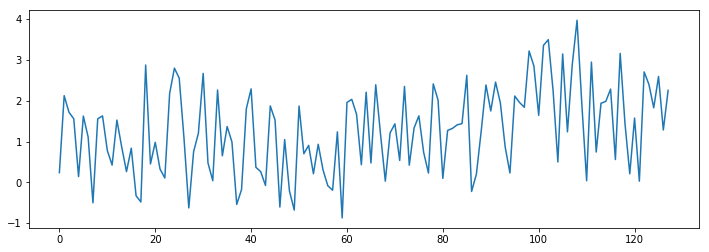

In [202]:
# ploting the first sample data for T1
DataPlot = Data_T1_torch.numpy()
plt.figure(figsize=(12,4))
plt.plot(np.arange(128), DataPlot[0][:])

# choose the device for computation

In [203]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
            
def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [204]:
device = get_default_device()
device

device(type='cuda')

# create a batch

In [205]:
# function to creat a batch 
from scipy import stats
from numba import jit, cuda
from numba import guvectorize
from numba import vectorize

#@vectorize(["float64(float64, float64, float64, float64)"], target='cuda')
#@guvectorize(["float64(float64, float64, float64, float64)"], target='cuda')
def input_data(data, label, sequence_length, AllData_Set):
    
   # creat this batch
    L = data.shape[0]
    
    for i in range(L-sequence_length):
        window = data[i:i+sequence_length,:]
        # performing zscore for each channel
        #window2 = stats.zscore(window1, axis=0)
        # performing zscore for all 2D input
        #window2 = stats.zscore(window1, axis=None)
        
        AllData_Set.append((window, label))

    return AllData_Set
    
    

In [206]:
# labeling should start with 0
# by considering batch creation
# determining the temporal dynamics of ECoG 
# feed the data for creating the batches
# append all the targets
AllData_Set = []    
Train_batch_1 = input_data(Data_T1_torch,torch.tensor(0), sequence_length, AllData_Set)
Train_batch_2 = input_data(Data_T2_torch,torch.tensor(1), sequence_length, Train_batch_1)
Train_batch_3 = input_data(Data_T3_torch,torch.tensor(2), sequence_length, Train_batch_2)
Train_batch_4 = input_data(Data_T4_torch,torch.tensor(3), sequence_length, Train_batch_3)
Train_batch_5 = input_data(Data_T4_torch,torch.tensor(4), sequence_length, Train_batch_4)
Train_batch_6 = input_data(Data_T4_torch,torch.tensor(5), sequence_length, Train_batch_5)
AllData_Set = Train_batch_6

In [207]:
len(AllData_Set)

12370

In [208]:
round (0.3*len(AllData_Set))

3711

In [209]:
AllData_Set[0]

(tensor([[ 2.3741e-01,  2.1233e+00,  1.7177e+00,  1.5575e+00,  1.4126e-01,
           1.6238e+00,  1.1083e+00, -5.0220e-01,  1.5567e+00,  1.6279e+00,
           7.8008e-01,  4.2273e-01,  1.5257e+00,  8.6695e-01,  2.6308e-01,
           8.3652e-01, -3.2910e-01, -4.8065e-01,  2.8742e+00,  4.5067e-01,
           9.7977e-01,  3.2483e-01,  1.0654e-01,  2.1765e+00,  2.7978e+00,
           2.5514e+00,  1.0765e+00, -6.2660e-01,  7.5018e-01,  1.2032e+00,
           2.6688e+00,  4.7551e-01,  4.0507e-02,  2.2620e+00,  6.5022e-01,
           1.3670e+00,  9.8937e-01, -5.4001e-01, -1.7927e-01,  1.8023e+00,
           2.2896e+00,  3.6773e-01,  2.6214e-01, -7.5967e-02,  1.8722e+00,
           1.5233e+00, -6.0537e-01,  1.0477e+00, -2.1383e-01, -6.7888e-01,
           1.8693e+00,  7.0095e-01,  9.0509e-01,  2.1093e-01,  9.3230e-01,
           3.0656e-01, -8.3552e-02, -1.9277e-01,  1.2358e+00, -8.7166e-01,
           1.9576e+00,  2.0340e+00,  1.6658e+00,  4.3218e-01,  2.2086e+00,
           4.7337e-01,  2

In [210]:
# for holdout data
HoldOutData_Set = []    
Train_batch_1 = input_data(Data_T1_HoldOut_torch,torch.tensor(0), sequence_length, HoldOutData_Set)
Train_batch_2 = input_data(Data_T2_HoldOut_torch,torch.tensor(1), sequence_length, Train_batch_1)
Train_batch_3 = input_data(Data_T3_HoldOut_torch,torch.tensor(2), sequence_length, Train_batch_2)
Train_batch_4 = input_data(Data_T4_HoldOut_torch,torch.tensor(3), sequence_length, Train_batch_3)
Train_batch_5 = input_data(Data_T4_HoldOut_torch,torch.tensor(4), sequence_length, Train_batch_4)
Train_batch_6 = input_data(Data_T4_HoldOut_torch,torch.tensor(5), sequence_length, Train_batch_5)
HoldOutData_Set = Train_batch_6

In [211]:
# number of batches for holdout data
len(HoldOutData_Set)/batch_size

8.9375

In [212]:
# spliting the data to 70% train and 30% test 
torch.manual_seed(101)
train_set, test_set = torch.utils.data.random_split(AllData_Set, [round(0.7*len(AllData_Set)),len(AllData_Set)-round(0.7*len(AllData_Set))])


In [213]:
len(train_set)

8659

In [214]:
# batching the data
torch.manual_seed(101)
train_loader = DataLoader(train_set, batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size, shuffle=False)
holdout_loader = DataLoader(HoldOutData_Set, batch_size, shuffle=False)

# create the LSTM model

In [215]:
# create the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout= 0)
        self.fc = nn.Linear(hidden_size, num_classes)
        
        # additional layer for classification problem
        #self.SoftAct = nn.Softmax()
        # for batch normalization
        # self.bn1 = nn.BatchNorm1d(sequence_length)
        
    
    def forward(self, x):
        h = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # for batch normalization
        # x = self.bn1(x)
        
        out, _ = self.lstm(x, (h, c))  
        
        out = self.fc(out[:, -1, :])
        
        # additional layer for classification problem
        # out = self.SoftAct(out)
        
        return out

# create an object from class

In [216]:
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
to_device(model, device)

LSTMModel(
  (lstm): LSTM(128, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=6, bias=True)
)

In [217]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [218]:
# Train the model

All_y_pred = []
All_y_train = []
Accuracy_test = []
loss_train = []
loss_test = []

#model = model.to(torch.long)
model = model.to(torch.float)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #print(labels.shape)
        labels = labels.T
        #print(labels)
        # for saving
        All_y_train.append(labels.numpy())
        
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(torch.long)
        labels = labels.to(device)
        
        #labels = labels.to(torch.float)
        
        # test with random inputs
        #target = torch.empty(batch_size, dtype=torch.long).random_(num_classes)
        #labels_1 = target
        
        #images = images.to(torch.long)
        images = images.to(torch.float)
        
        # zero the parameter gradients
        #optimizer.zero_grad()
        # reset hidden states
        #model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
        
                
        # Forward pass
        outputs = model(images)
        #outputs = outputs.to(torch.long)
        outputs = outputs.to(torch.float)
        loss = criterion(outputs, labels)
        loss_train.append(criterion(outputs, labels))
        
        # for saving 
        _, predicted = torch.max(outputs.data, 1)
        All_y_pred.append(predicted.cpu().numpy())
        
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    # Evaluate the model
    #model.eval()
    with torch.no_grad():
        right = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.T
            labels = labels.to(torch.long)
            labels = labels.to(device)
            images = images.to(torch.float)
            outputs = model(images)
            loss_test.append(criterion(outputs, labels))
            _, predicted = torch.max(outputs.data, 1)
            total = labels.size(0)
            right = (predicted == labels).sum().item()
            Accuracy_test.append(100 * right / total)

    print('Test Accuracy of the model on the test images: {} %'.format(100 * right / total))

Epoch [1/10], Step [100/136], Loss: 1.2682
Test Accuracy of the model on the test images: 49.20634920634921 %
Epoch [2/10], Step [100/136], Loss: 1.1878
Test Accuracy of the model on the test images: 58.73015873015873 %
Epoch [3/10], Step [100/136], Loss: 1.0554
Test Accuracy of the model on the test images: 47.61904761904762 %
Epoch [4/10], Step [100/136], Loss: 0.9725
Test Accuracy of the model on the test images: 60.317460317460316 %
Epoch [5/10], Step [100/136], Loss: 0.9094
Test Accuracy of the model on the test images: 57.142857142857146 %
Epoch [6/10], Step [100/136], Loss: 0.7042
Test Accuracy of the model on the test images: 53.96825396825397 %
Epoch [7/10], Step [100/136], Loss: 0.7202
Test Accuracy of the model on the test images: 50.79365079365079 %
Epoch [8/10], Step [100/136], Loss: 0.7937
Test Accuracy of the model on the test images: 53.96825396825397 %
Epoch [9/10], Step [100/136], Loss: 0.7144
Test Accuracy of the model on the test images: 57.142857142857146 %
Epoch [

In [219]:
labels

tensor([3, 2, 4, 2, 3, 3, 2, 3, 4, 1, 1, 5, 0, 2, 4, 2, 3, 5, 5, 2, 1, 4, 0, 1,
        3, 5, 3, 2, 5, 1, 1, 1, 3, 5, 4, 1, 3, 3, 5, 2, 2, 4, 1, 3, 3, 4, 2, 2,
        2, 2, 1, 4, 2, 2, 1, 4, 2, 1, 5, 4, 5, 1, 4], device='cuda:0')

In [220]:
# check the number of parameters in layers
for p in model.parameters():
    print(p.numel())

25600
10000
200
200
300
6


In [221]:
# for ploting 
Accuracies = []
for i in range(len(All_y_pred)):
    acc = ((All_y_pred[i] == All_y_train[i].T).sum().item())/batch_size*100
    Accuracies.append(acc)

(0, 100)

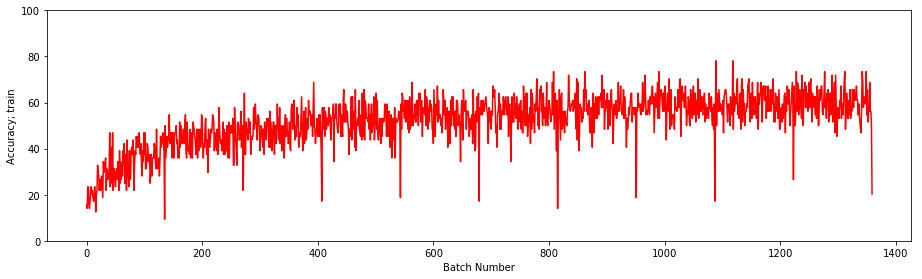

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(All_y_pred),1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracies,'r')
ax.set_ylabel('Accuracy; train')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification4_trainAccBroadBand_4target.png',facecolor='w', transparent=False, dpi=300)


Text(0.5, 0, 'Batch Number')

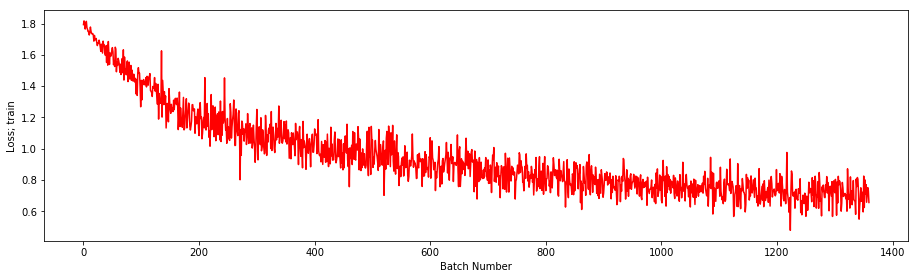

In [223]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(loss_train),1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,loss_train,'r')
ax.set_ylabel('Loss; train')
ax.set_xlabel('Batch Number')
#plt.ylim([0, 100])
#plt.savefig('LSTM_Classification4_trainLossBroadBand_4target.png',facecolor='w', transparent=False, dpi=300)

(0, 100)

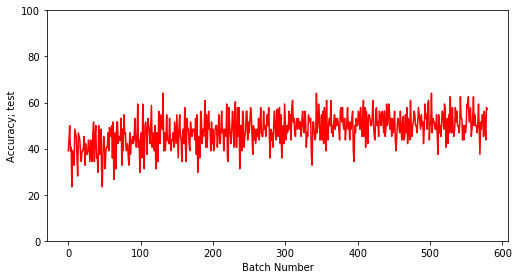

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(Accuracy_test),1)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracy_test,'r')
ax.set_ylabel('Accuracy; test')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification4_testAccBroadBand_4target.png',facecolor='w', transparent=False, dpi=300)


Text(0.5, 0, 'Batch Number')

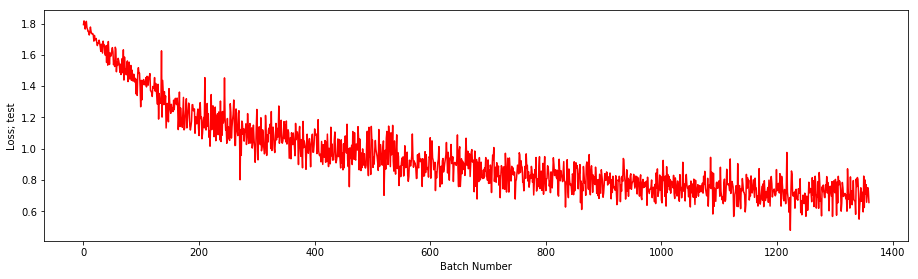

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(loss_train),1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,loss_train,'r')
ax.set_ylabel('Loss; test')
ax.set_xlabel('Batch Number')
#plt.ylim([0, 100])
#plt.savefig('LSTM_Classification4_testLossBroadBand_4target.png',facecolor='w', transparent=False, dpi=300)

In [226]:
# Evaluate the model
#model.eval()
# test on holdout data

Accuracy_holdout = []

with torch.no_grad():
    right = 0
    total = 0
    for images, labels in holdout_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.T
        #print(labels)
        labels = labels.to(torch.long)
        labels = labels.to(device)
        images = images.to(torch.float)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        right = (predicted == labels).sum().item()
        Accuracy_holdout.append(100 * right / total)

print('Test Accuracy of the model on the test images: {} %'.format(100 * right / total))

Test Accuracy of the model on the test images: 11.666666666666666 %


In [227]:
labels

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], device='cuda:0')

(0, 100)

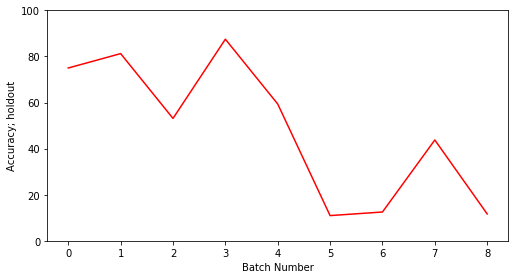

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(Accuracy_holdout),1)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracy_holdout,'r')
ax.set_ylabel('Accuracy; holdout')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification3_holdout3Features_4target.png',facecolor='w', transparent=False, dpi=300)


In [229]:
# calculate the accuracy in trial based 
import statistics

def Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted):
    

    for i in range(Trials_Num):

        HoldOutData_Set = []
        Trial_Target = Trials_Data_HoldOut[int(sum(Trials_Sizes[0:i+1])):int(sum(Trials_Sizes[0:i+1])+Trials_Sizes[i+1]),:]
        HoldOutData_Set = input_data(Trial_Target, Target, sequence_length, HoldOutData_Set)

        with torch.no_grad():

            for images, labels in HoldOutData_Set:
                images = images.reshape(-1, sequence_length, input_size).to(device)
                images = images.to(torch.float)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                #print((predicted.cpu().numpy().item()))
                All_Predicted.append(predicted.cpu().numpy().item())

        Counting =[All_Predicted.count(0), All_Predicted.count(1), All_Predicted.count(2), All_Predicted.count(3), All_Predicted.count(4), All_Predicted.count(5)] 
        Trials_Predicted.append(np.argmax(Counting))
        
    return Trials_Predicted
    


In [230]:
# for target one
Trials_Num = len(Trials_Size_T1_HoldOut)
Trials_Data_HoldOut = Data_T1_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T1_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T1_HoldOut))

Target = torch.tensor(0)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted1 = Trials_Predicted
Trials_Predicted.count(0)/len(Trials_Predicted)*100

71.42857142857143

In [231]:
# for target two
Trials_Num = len(Trials_Size_T2_HoldOut)
Trials_Data_HoldOut = Data_T2_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T2_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T2_HoldOut))
Target = torch.tensor(1)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted2 = Trials_Predicted
Trials_Predicted.count(1)/len(Trials_Predicted)*100

78.94736842105263

In [232]:
# for target three
Trials_Num = len(Trials_Size_T3_HoldOut)
Trials_Data_HoldOut = Data_T3_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T3_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T3_HoldOut))
Target = torch.tensor(2)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted3 = Trials_Predicted
Trials_Predicted.count(2)/len(Trials_Predicted)*100

90.47619047619048

In [233]:
# for target four
Trials_Num = len(Trials_Size_T4_HoldOut)
Trials_Data_HoldOut = Data_T4_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T4_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T4_HoldOut))
Target = torch.tensor(3)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted4 = Trials_Predicted
Trials_Predicted.count(3)/len(Trials_Predicted)*100

0.0

In [234]:
# for target five
Trials_Num = len(Trials_Size_T5_HoldOut)
Trials_Data_HoldOut = Data_T5_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T4_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T5_HoldOut))
Target = torch.tensor(4)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted5 = Trials_Predicted
Trials_Predicted.count(4)/len(Trials_Predicted)*100

0.0

In [235]:
# for target six
Trials_Num = len(Trials_Size_T6_HoldOut)
Trials_Data_HoldOut = Data_T6_HoldOut_torch
#Trials_Sizes = np.concatenate((np.array([0]),Trials_Size_T4_HoldOut))
Trials_Sizes = np.concatenate((np.array([0]),Click_BinNum_T6_HoldOut))
Target = torch.tensor(5)
All_Predicted = []
Trials_Predicted = []
Trials_Predicted = Trial_Based_Accuracy(Trials_Num,Trials_Data_HoldOut,Trials_Sizes,Target,All_Predicted,Trials_Predicted)
Trials_Predicted6 = Trials_Predicted
Trials_Predicted.count(5)/len(Trials_Predicted)*100

0.0

In [236]:
y_true = len(Trials_Predicted1)*[0] + len(Trials_Predicted2)*[1] + len(Trials_Predicted3)*[2] + len(Trials_Predicted4)*[3] + len(Trials_Predicted5)*[4] + len(Trials_Predicted6)*[5]
y_pred = Trials_Predicted1 + Trials_Predicted2 + Trials_Predicted3 + Trials_Predicted4 + Trials_Predicted5 + Trials_Predicted6 

In [237]:
# confusion matrix
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

CM1 = confusion_matrix(y_true, y_pred)
print(CM1)
CM2 = np.zeros((6,6))
for i in range(6):
    for j in range(6):
        CM2[i][j] = CM1[i][j]/sum(CM1[i,:])*100


[[15  0  6  0  0  0]
 [ 0 15  3  1  0  0]
 [ 0  2 19  0  0  0]
 [ 0 11  8  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0 19  0  0  0  0]]


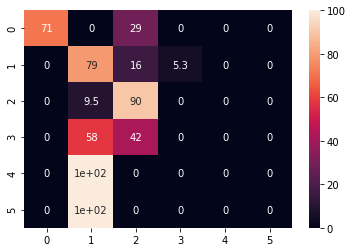

In [238]:
import seaborn as sns
ax = sns.heatmap(CM2, annot=True)
#plt.savefig('./CV_Days_LSTM/HG_3bin_6class_TestOn_Day10.png')

# Testing the model over all period of each trial; is it responding faster? 

In [ ]:
# replay the trial data through the generated model and exit after correct selection 
import statistics

def Trial_Based_OutPuts(Trials_Data_HoldOut,Click_Num,Target,All_Predicted):
    
    HoldOutData_Set = []
    HoldOutData_Set = input_data(Trials_Data_HoldOut, Target, sequence_length, HoldOutData_Set)

    with torch.no_grad():

        for images, labels in HoldOutData_Set:
            images = images.reshape(-1, sequence_length, input_size).to(device)
            images = images.to(torch.float)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            #print((predicted.cpu().numpy().item()))
            All_Predicted.append(predicted.cpu().numpy().item())

    # moving window for selection based on Click_Num
    Bin_Prediction = []
    if int(len(All_Predicted)-Click_Num)<= int(Click_Num):
        Window_Predicted = All_Predicted
        Counting =[Window_Predicted.count(0), Window_Predicted.count(1), Window_Predicted.count(2), Window_Predicted.count(3)]
        Bin_Prediction.append(np.argmax(Counting))

    else:
        for i in range(int(len(All_Predicted)-Click_Num)):
            Window_Predicted = All_Predicted[i:i+int(Click_Num)]
            Counting =[Window_Predicted.count(0), Window_Predicted.count(1), Window_Predicted.count(2), Window_Predicted.count(3)]
            Bin_Prediction.append(np.argmax(Counting))

            
    return Bin_Prediction

In [ ]:
# for target one
Bin_SelectionNum = []
for i in range(len(Trials_T1_BinControl_HoldOut)):
    
    Click_Num, Trials_Data_HoldOut_allFe = Trials_T1_BinControl_HoldOut[i]
    Trials_Data_HoldOut = Trials_Data_HoldOut_allFe[:,6*128:]
    Trials_Data_HoldOut_torch = torch.from_numpy(Trials_Data_HoldOut)
    All_Predicted = []
    Target = torch.tensor(0)
    Bin_Prediction = Trial_Based_OutPuts(Trials_Data_HoldOut_torch,Click_Num,Target,All_Predicted)
    
    for j in range(len(Bin_Prediction)): 
        if Bin_Prediction[j] == 0: 
            Bin_SelectionNum.append(tuple((Trials_Data_HoldOut_allFe.shape[0], j))) 
            break 

In [ ]:
Bin_SelectionNum

In [ ]:
# for target two
Bin_SelectionNum = []
for i in range(len(Trials_T2_BinControl_HoldOut)):
    
    Click_Num, Trials_Data_HoldOut_allFe = Trials_T2_BinControl_HoldOut[i]
    Trials_Data_HoldOut = Trials_Data_HoldOut_allFe[:,6*128:]
    Trials_Data_HoldOut_torch = torch.from_numpy(Trials_Data_HoldOut)
    All_Predicted = []
    Target = torch.tensor(1)
    Bin_Prediction = Trial_Based_OutPuts(Trials_Data_HoldOut_torch,Click_Num,Target,All_Predicted)
        
    for j in range(len(Bin_Prediction)): 
        if Bin_Prediction[j] == 1: 
            Bin_SelectionNum.append(tuple((Trials_Data_HoldOut_allFe.shape[0], j))) 
            break 

In [ ]:
Bin_SelectionNum

In [ ]:
# for target three 
Bin_SelectionNum = []
for i in range(len(Trials_T3_BinControl_HoldOut)):
    
    Click_Num, Trials_Data_HoldOut_allFe = Trials_T3_BinControl_HoldOut[i]
    Trials_Data_HoldOut = Trials_Data_HoldOut_allFe[:,6*128:]
    Trials_Data_HoldOut_torch = torch.from_numpy(Trials_Data_HoldOut)
    All_Predicted = []
    Target = torch.tensor(2)
    Bin_Prediction = Trial_Based_OutPuts(Trials_Data_HoldOut_torch,Click_Num,Target,All_Predicted)
        
    for j in range(len(Bin_Prediction)): 
        if Bin_Prediction[j] == 2: 
            Bin_SelectionNum.append(tuple((Trials_Data_HoldOut_allFe.shape[0], j))) 
            break 


In [ ]:
Bin_SelectionNum

In [ ]:
# for target four 
Bin_SelectionNum = []
for i in range(len(Trials_T4_BinControl_HoldOut)):
    
    Click_Num, Trials_Data_HoldOut_allFe = Trials_T4_BinControl_HoldOut[i]
    Trials_Data_HoldOut = Trials_Data_HoldOut_allFe[:,6*128:]
    Trials_Data_HoldOut_torch = torch.from_numpy(Trials_Data_HoldOut)
    All_Predicted = []
    Target = torch.tensor(3)
    Bin_Prediction = Trial_Based_OutPuts(Trials_Data_HoldOut_torch,Click_Num,Target,All_Predicted)
        
    for j in range(len(Bin_Prediction)): 
        if Bin_Prediction[j] == 3: 
            Bin_SelectionNum.append(tuple((Trials_Data_HoldOut_allFe.shape[0], j))) 
            break 

In [ ]:
Bin_SelectionNum